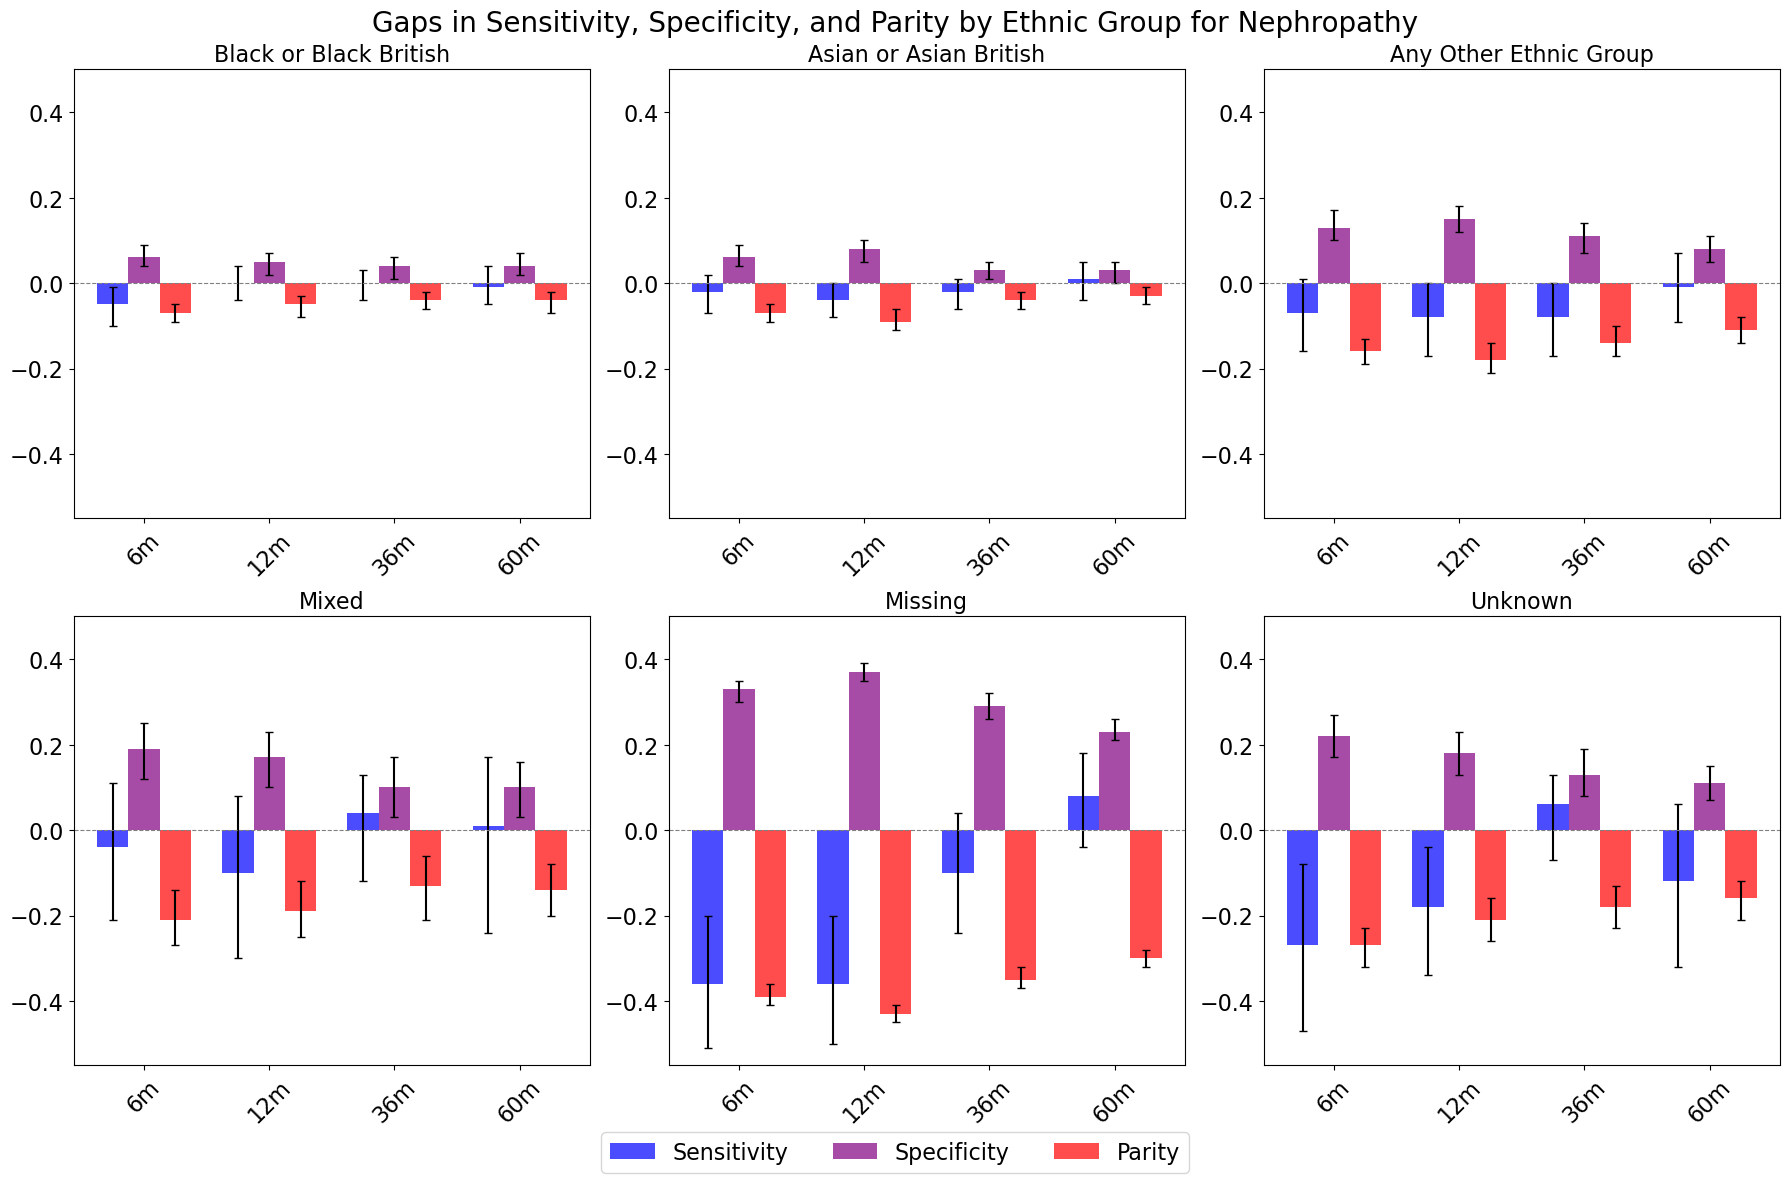

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create a single plot
def create_plot(ax, data, title):
    time_frames, sensitivity, specificity, parity, sensitivity_ci, specificity_ci, parity_ci = data
    
    width = 0.25
    x = np.arange(len(time_frames))
    
    bars1 = ax.bar(x - width, sensitivity, width, label='Sensitivity', color='blue', alpha=0.7)
    bars2 = ax.bar(x, specificity, width, label='Specificity', color='purple', alpha=0.7)
    bars3 = ax.bar(x + width, parity, width, label='Parity', color='red', alpha=0.7)
    
    ax.errorbar(x - width, sensitivity, yerr=np.abs(np.array(sensitivity_ci).T - sensitivity), fmt='none', color='black', capsize=3)
    ax.errorbar(x, specificity, yerr=np.abs(np.array(specificity_ci).T - specificity), fmt='none', color='black', capsize=3)
    ax.errorbar(x + width, parity, yerr=np.abs(np.array(parity_ci).T - parity), fmt='none', color='black', capsize=3)
    
    ax.set_title(title, fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(time_frames, fontsize=16, rotation=45)
    ax.tick_params(axis='y', labelsize=16)  # Add this line to set y-axis font size
    ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
    ax.set_ylim(-0.55, 0.5)  # Adjust this range if needed

# Data for each ethnic group
groups_data = {
    "Black or Black British": (
        ['6m', '12m', '36m', '60m'],
        [-0.05, 0.0, -0.0, -0.01],
        [0.06, 0.05, 0.04, 0.04],
        [-0.07, -0.05, -0.04, -0.04],
        [(-0.1, -0.01), (-0.04, 0.04), (-0.04, 0.03), (-0.05, 0.04)],
        [(0.04, 0.09), (0.02, 0.07), (0.01, 0.06), (0.02, 0.07)],
        [(-0.09, -0.05), (-0.08, -0.03), (-0.06, -0.02), (-0.07, -0.02)]
    ),
    "Asian or Asian British": (
        ['6m', '12m', '36m', '60m'],
        [-0.02, -0.04, -0.02, 0.01],
        [0.06, 0.08, 0.03, 0.03],
        [-0.07, -0.09, -0.04, -0.03],
        [(-0.07, 0.02), (-0.08, 0.0), (-0.06, 0.01), (-0.04, 0.05)],
        [(0.04, 0.09), (0.05, 0.1), (0.01, 0.05), (0.0, 0.05)],
        [(-0.09, -0.05), (-0.11, -0.06), (-0.06, -0.02), (-0.05, -0.01)]
    ),
    "Any Other Ethnic Group": (
        ['6m', '12m', '36m', '60m'],
        [-0.07, -0.08, -0.08, -0.01],
        [0.13, 0.15, 0.11, 0.08],
        [-0.16, -0.18, -0.14, -0.11],
        [(-0.16, 0.01), (-0.17, -0.0), (-0.17, -0.0), (-0.09, 0.07)],
        [(0.1, 0.17), (0.12, 0.18), (0.07, 0.14), (0.05, 0.11)],
        [(-0.19, -0.13), (-0.21, -0.14), (-0.17, -0.1), (-0.14, -0.08)]
    ),
    "Mixed": (
        ['6m', '12m', '36m', '60m'],
        [-0.04, -0.1, 0.04, 0.01],
        [0.19, 0.17, 0.1, 0.1],
        [-0.21, -0.19, -0.13, -0.14],
        [(-0.21, 0.11), (-0.3, 0.08), (-0.12, 0.13), (-0.24, 0.17)],
        [(0.12, 0.25), (0.1, 0.23), (0.03, 0.17), (0.03, 0.16)],
        [(-0.27, -0.14), (-0.25, -0.12), (-0.21, -0.06), (-0.2, -0.08)]
    ),
    "Missing": (
        ['6m', '12m', '36m', '60m'],
        [-0.36, -0.36, -0.1, 0.08],
        [0.33, 0.37, 0.29, 0.23],
        [-0.39, -0.43, -0.35, -0.3],
        [(-0.51, -0.2), (-0.5, -0.2), (-0.24, 0.04), (-0.04, 0.18)],
        [(0.3, 0.35), (0.35, 0.39), (0.26, 0.32), (0.21, 0.26)],
        [(-0.41, -0.36), (-0.45, -0.41), (-0.37, -0.32), (-0.32, -0.28)]
    ),
    "Unknown": (
        ['6m', '12m', '36m', '60m'],
        [-0.27, -0.18, 0.06, -0.12],
        [0.22, 0.18, 0.13, 0.11],
        [-0.27, -0.21, -0.18, -0.16],
        [(-0.47, -0.08), (-0.34, -0.04), (-0.07, 0.13), (-0.32, 0.06)],
        [(0.17, 0.27), (0.13, 0.23), (0.08, 0.19), (0.07, 0.15)],
        [(-0.32, -0.23), (-0.26, -0.16), (-0.23, -0.13), (-0.21, -0.12)]
    )
}

# Create the grid of plots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Gaps in Sensitivity, Specificity, and Parity by Ethnic Group for Nephropathy', fontsize=20)

for ax, (group, data) in zip(axs.flatten(), groups_data.items()):
    create_plot(ax, data, group)

# Add a common legend
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Make room for the legend

# Optionally, save the figure
plt.savefig('ethnic_groups_gaps_grid_nephropathy.png', dpi=300, bbox_inches='tight')

plt.show()
